<a href="https://colab.research.google.com/github/qusai238/Simmulation-of-an-SIS-model-using-Gillspie-Algorithm-/blob/main/MCMS_Report_Final_Simmulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MCMS Problem Set 

#Introduction

In this notbook two different ODE's which represent a system that the investigation is carried on are given, the analytical solutions of previous steps could be found in a separate file and was carried out manually by pen and paper. The analytical solution was then to carry out the simulation code using the gillispie algorithm , which is an algorithm used to predict the trajectories of a stochastic equation system using relatively low computational power. the gillispie algorith was used in the simmulation part to get a better understanding of the behaviour of the system with varying scenarois and number of runs for each scenario. Detailed explanation of the outputs of each section could be seen further in this notebook.

In [ ]:
#Importing Essential Libraries
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter('ignore')


#Analytical part

##Question 3

For this dynamical system two equilibrium points are present which are (N,0) and (N/R0,N-N/R0),and there is also a trivial equilibrium point of (0,0).

since (N,0) is not in terms of R0 it can't be plot against R0, so it is just a **stable** fixed point of (N,0) when **gamman<Beta.** 

The other equilibrium point (N/R0,N-N/R0) is a stable fixed point when gamma>Beta.

So it can be noticed that the stability has a relationship with R0=gamma/beta, or in other words the stability relies on the parameters of the equations which are gamma and beta.

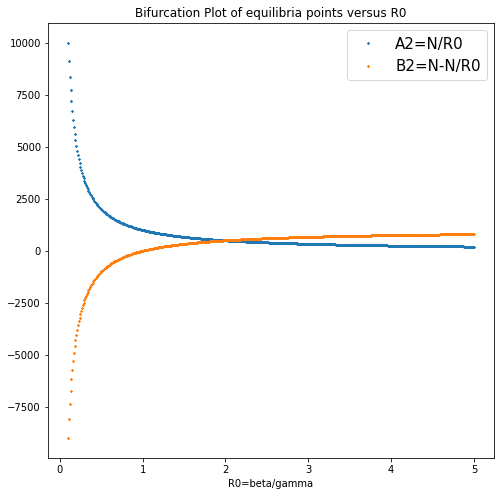

In [ ]:
#Assuming a population size of N=1000
#R0 ranges between (0.1,5) with 500 points to plot on the interval 

N=1000
R0=np.linspace(0.1,5,500)
A1=N
B1=0
A2=N/R0
B2=(N-N/R0)

plt.figure(figsize=(8,8))
plt.xlabel('R0=beta/gamma',)
plt.title('Bifurcation Plot of equilibria points versus R0')
plt.rcParams.update({'font.size':15})
plt.plot(R0,A2,'*',markersize=2)
plt.plot(R0,B2,'*',markersize=2)
labels=['A2=N/R0','B2=N-N/R0']
plt.legend(labels)

##Question 5

In [ ]:
#This is the function which returns B(t) from quesiton 4 in the analytical part
def Bt(N,beta,gamma,B0,time):
  numerator=B0*N*(gamma-beta)
  denominator=((np.exp(gamma-beta*time))*(N*(gamma-beta)+B0*beta))-(beta*B0)
  Bt=numerator/denominator

  return Bt


In [ ]:
#creating different cases using a list of lists to consider

population=1000
initialB0=10
maxT=1000

cases=[['B0=0',population,0,0.75,0.5],
      ['Small R0', population, initialB0*50, 0.05, 0.5],
      ['Large R0', population, initialB0 *50, 2.5, 0.5],
      ['R0= 1', population, initialB0*50, 0.5, 0.5],
      ['Small N', population/10, initialB0, 1, 0.5],
      ['Large N', population*10, initialB0, 1, 0.5],
      ['Small B0', population, initialB0, 1, 0.5],
      ['Large B0', population, initialB0*90, 1, 0.5],
      ['Fixed R0, Changing gamma',population,initialB0*50,5,2.5]]


B0=0 population=1000,B0=0,beta=0.75,gamma=0.5


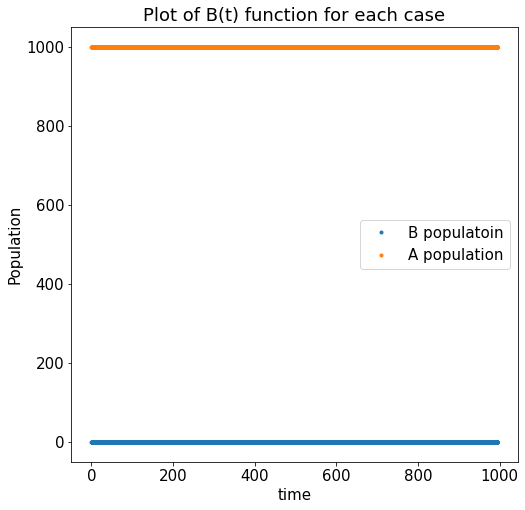

Small R0 population=1000,B0=500,beta=0.05,gamma=0.5


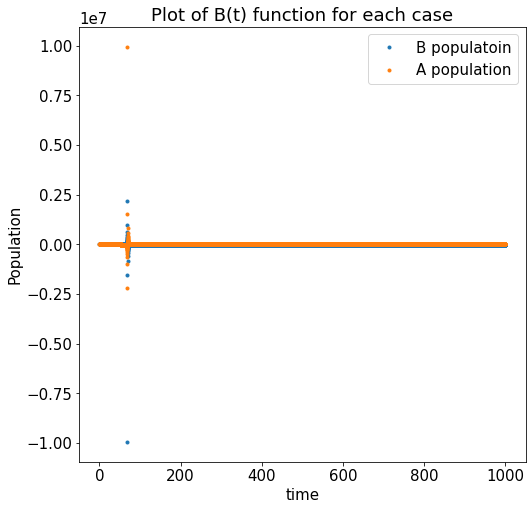

Large R0 population=1000,B0=500,beta=2.5,gamma=0.5


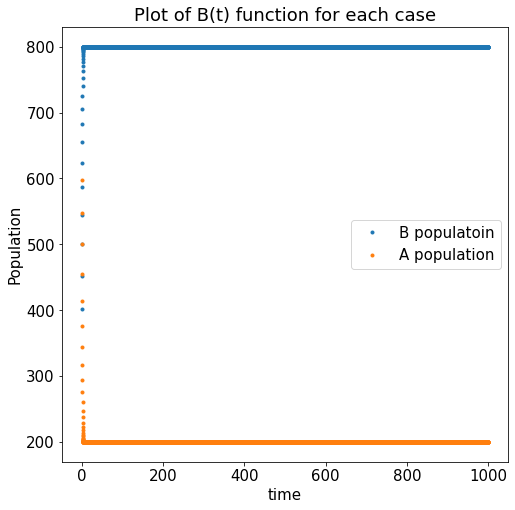

R0= 1 population=1000,B0=500,beta=0.5,gamma=0.5


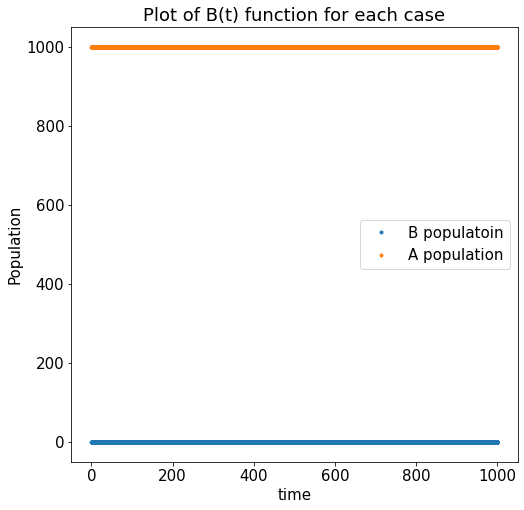

Small N population=1000,B0=10,beta=1,gamma=0.5


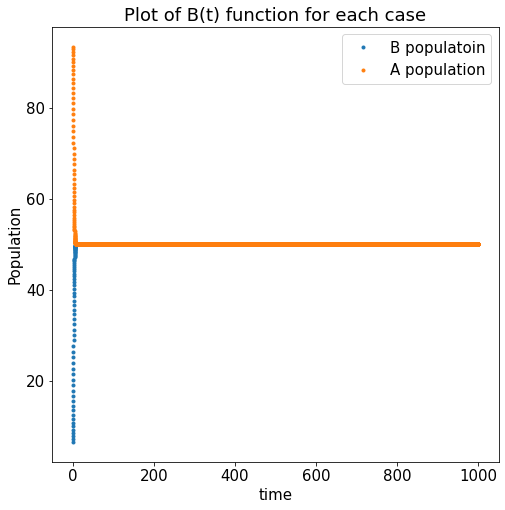

Large N population=1000,B0=10,beta=1,gamma=0.5


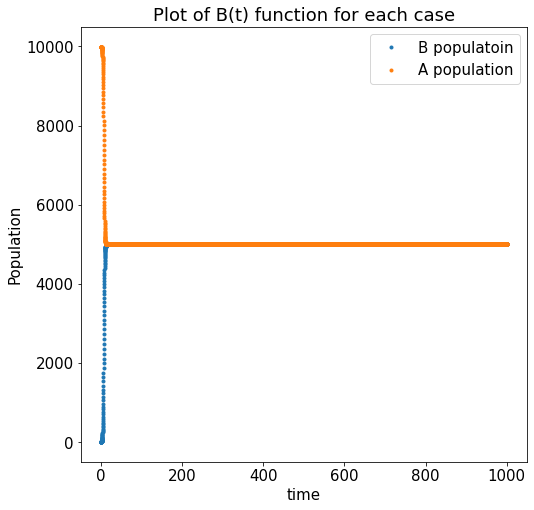

Small B0 population=1000,B0=10,beta=1,gamma=0.5


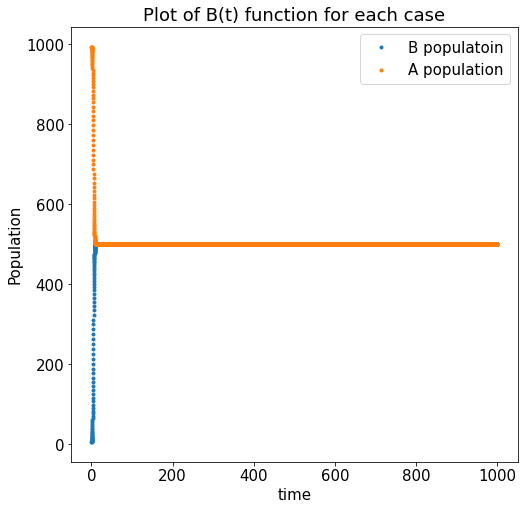

Large B0 population=1000,B0=900,beta=1,gamma=0.5


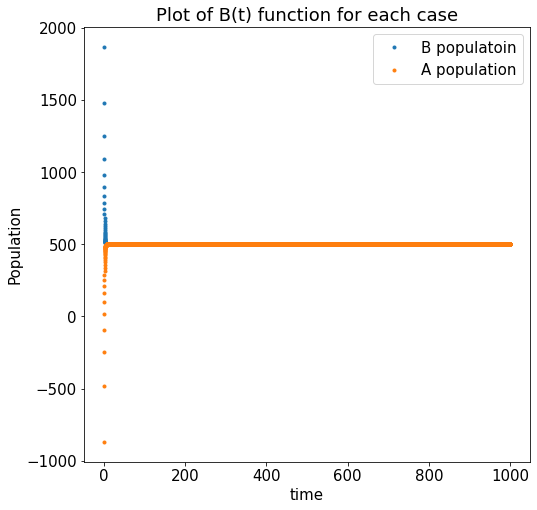

Fixed R0, Changing gamma population=1000,B0=500,beta=5,gamma=2.5


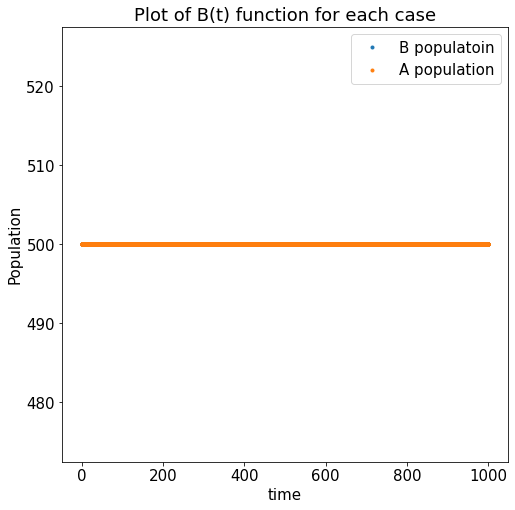

In [ ]:
#looping over the different cases above to produce different plots
for n in cases:
    print(n[0],f'population={population},B0={n[2]},beta={n[3]},gamma={n[4]}')
    N = int(n[1])
    B0 = int(n[2])
    beta = n[3]
    gamma = n[4]

    time_values=np.linspace(0,maxT,num=10000)
    y=Bt(N,beta,gamma,B0,time_values)

    #plotting the outputs
    plt.figure(figsize=(8,8))
    plt.plot(time_values,y,'.',lw=5)
    plt.plot(time_values,N-y,'.',lw=5)
    plt.xlabel('time')
    plt.ylabel('Population')
    labels=['B populatoin','A population']
    plt.legend(labels)
    plt.title('Plot of B(t) function for each case')
    plt.show() 



So from the previous graphs plotted some observations can be concluded:


*   The populations seem to converge to the non zero equilibrium point which is (A*=N/R0 , B*=N-N/R0) for large times , so that confirms that the expression for B(t) is correct.

* when R0=1 the numerator for the B(t) function is zeros, and beta and gamma are also zeros, which means that the change of the B population is zero because the rate of change of B population is zero against time, also the A population will stay constant because both parameters beta and gamma have the same values


*  From the last plot, for a given value of R0, if beta is fixed and gamma is changed the plot will be the same for the same values of R0,that is because the term (gamma-beta) is present in both the numerator and the denominator of the B(t) equation, and R0 represents the parameters of the equations for both populations so as long as R0 is constant the change in the both populations will be the same and both populations will tend to go to the non zero equilibrium point (N/R0,N-N/R0).


* Also it can be noted that when B0 is zero the numerator of the function B(t) will also be zero so the change of the population with respect to time will also be zero since B(t) will equal to zero that why the line is a constant line.









In [ ]:
#defining the Forward Euler function to integrate the mean field equation

def euler(F,B0,T=1000,n=1000):
  t=np.zeros(n+1)
  B=np.zeros(n+1)
  B[0]=B0 #setting the initial condition 
  t[0]=0
  h=T/n #time step of 1 
  for i in range(n):
    t[i+1]=t[i]+h
    B[i+1]=B[i]+h*F(B[i],t[i])
  return (B,t)


Text(0.5, 1.0, 'Mean field equation using forward euler \n for different R0')

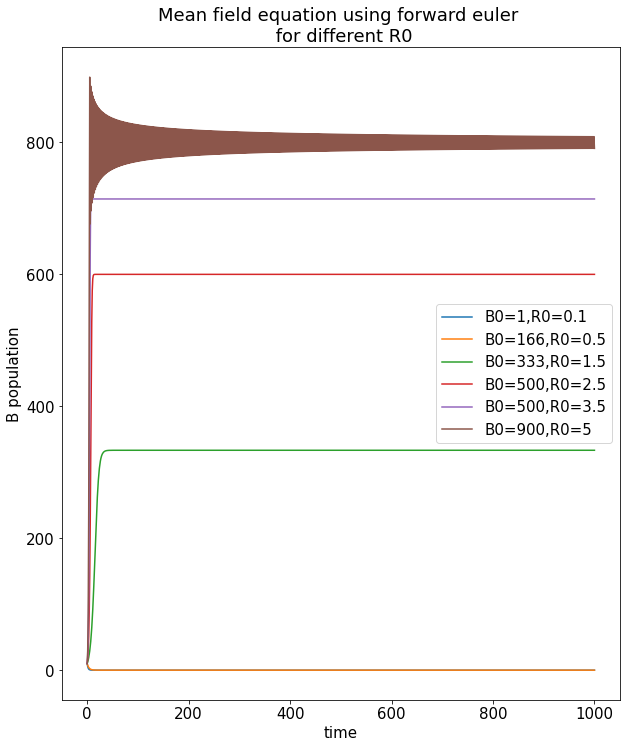

In [ ]:
#using a fixed gamma of 0.5 and varying betta to get different values for R0
#defining the mean field equation which takes in two inputs to use it in the euler integration function.

R0=[0.1,0.5,1.5,2.5,3.5,5]

plt.figure(figsize=(10,12))
plt.xlabel('time')
plt.ylabel('B population')
labels=['B0=1,R0=0.1','B0=166,R0=0.5','B0=333,R0=1.5','B0=500,R0=2.5','B0=500,R0=3.5','B0=900,R0=5']


for R in R0:
  beta=0.5*R
  def F(B,t):#The mean field equation

    return(beta-((beta*B)/1000)-0.5)*B #mean filed equation with N=1000 and gamma fixed at 0.5
  B1,T1=euler(F,10)
  plt.plot(T1,B1)

plt.legend(labels,loc=0)
plt.title('Mean field equation using forward euler \n for different R0')

From using the forward Euler method to integrate the mean field equation, it can be noticed that there is agreement between the B(t) equation and the mean field equaiton, as in both cases the population tends to go to the non zero equilibrium for large times t, this means that there is agreement between both equations regarding all cases taken into consideration while varying R0 for the forward euler.

#Simulation Part

In this part a Simulation will be carried out using the Gillespie algorithm, which is an algorithm used to simulate complex systems, this algorithm provides discrete trajectories of the simulation, i.e. one run of this algorithm represents a single sample trajectory of all the possible trajectories. In the simulation part each case was run 10 times using the gillispie algorithm 

##Question 1

In [ ]:
#code for the Gillespie Algorithm
from random import expovariate  # Generate variates from exponential distribution

#The gillespie Algorithm

def gillespie_ABA(N, B0, beta, gamma, Tmax):
    A = [N - B0]  # We cannot predict how many elements there will be unfortunately
    B = [B0]
    T = [0]
    state = np.random.permutation([0] * (N - B0) + [1] * B0)  # Randomly allocate B0 individuals to have state B (state=1), A (state=0) otherwise
    B_contacts = np.where(state == 1)[0]  # Index of individuals in state B (state=1).
    rate_vector = B0 * beta * np.ones((N, 1)) / N  # Set rates to be B0*beta/N (rate for individuals in state A) to all individuals (initialisation).
    rate_vector[B_contacts] = gamma  # Update rate of B_contacts to be gamma (the rate for individuals in state B)

    time = 0
    while time <= Tmax + 0.5:  # some (arbitrary) buffer after Tmax
        rate = np.sum(rate_vector)  # Total rate (refer to Gillespie algorithm for details)
        cumrate = np.cumsum(rate_vector)  # Cumulated sum of rates
        if rate > 0.000001:  # if rate is sufficiently large
            tstep = expovariate(rate)  # Pick an exponentially distributed time. Beware of difference with exprnd in Matlab where it is 1/rate
            T.append(T[-1] + tstep)  # Time of next event
            event = np.where(cumrate > np.random.rand() * rate)[0][0]  # Find which individual will see its state change
            if state[event] == 0:  # individual is in state A
                A.append(A[-1] - 1)  # this state A individual becomes state B so number of state A individuals is decreased
                B.append(B[-1] + 1)  # obviously, number of state B individuals is increased
                state[event] = 1  # Update state vector
                rate_vector[event] = gamma  # Change rate of individual to B->A rate, namely gamma
                A_contacts = np.where(state == 0)[0]  # List of state A individuals after change
                rate_vector[ A_contacts] += beta / N  # Update rate of state A individuals to account for the extra state B individual
            else:  # individual is in state B
                B.append( B[-1] - 1)  # this state B individual becomes state A so number of state B individuals is decreased
                A.append(A[-1] + 1)  # obviously, number of state A individuals is increased
                state[event] = 0  # Update state vector
                A_contacts = np.where(state == 0)[ 0]  # List of state A individuals after changes
                rate_vector[A_contacts] = beta * len(np.where(state == 1)[ 0]) / N  # Update rate of state A individuals based on number of B individuals
        else:  # Nothing will happen from now on so we can accelerate the process
            time = T[-1]  # current time
            while time <= Tmax + 0.5:
                A.append(A[-1])  # Just keep things as they are
                B.append(B[-1])
                T.append(T[-1] + 0.5)  # arbitrarily add 0.5 to clock
                time = T[-1]
        # Update time and proceed with loop
        time = T[-1]

    return T, A, B

Small R0 population=1000,B0=500,beta=0.05,gamma=0.5


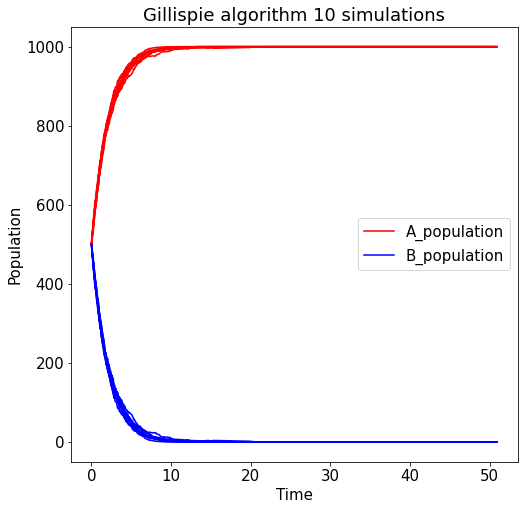

Large R0 population=1000,B0=500,beta=2.5,gamma=0.5


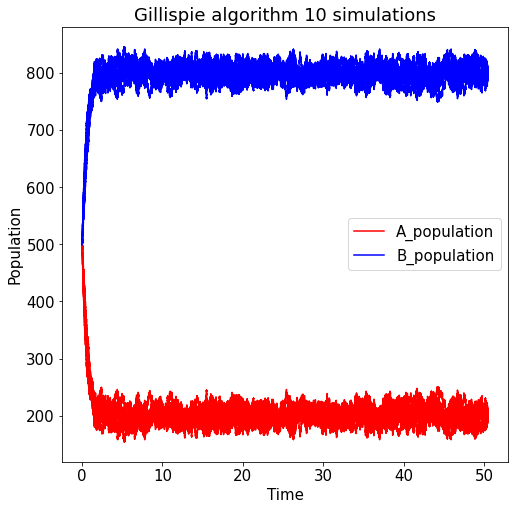

R0= 1 population=1000,B0=500,beta=0.5,gamma=0.5


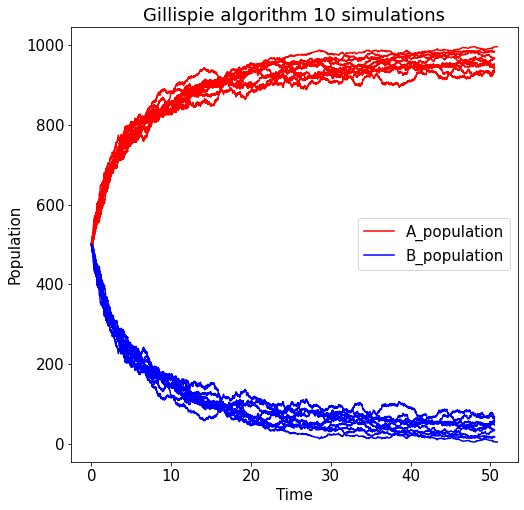

Small N population=100.0,B0=1,beta=1,gamma=0.5


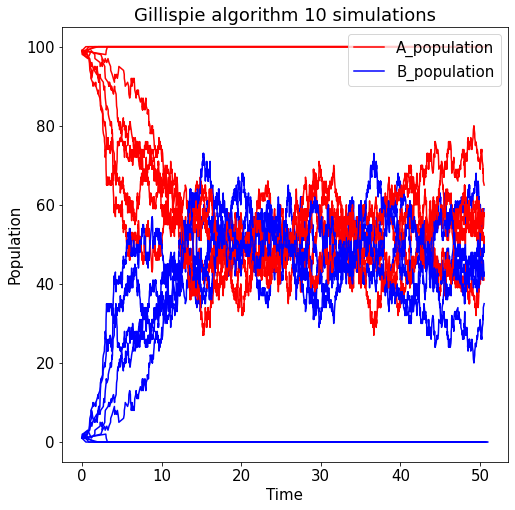

Large N population=10000,B0=500,beta=1,gamma=0.5


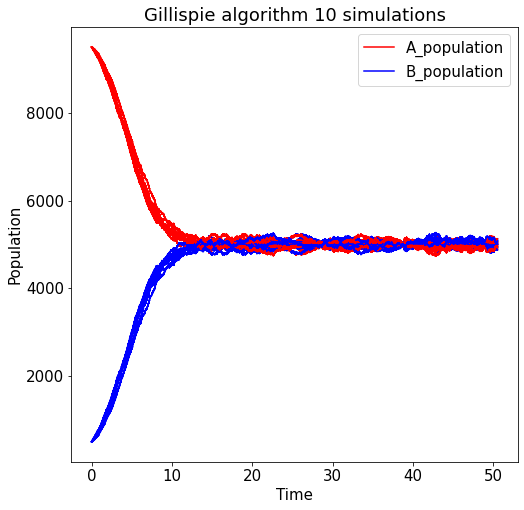

Small B0 population=1000,B0=1,beta=1,gamma=0.5


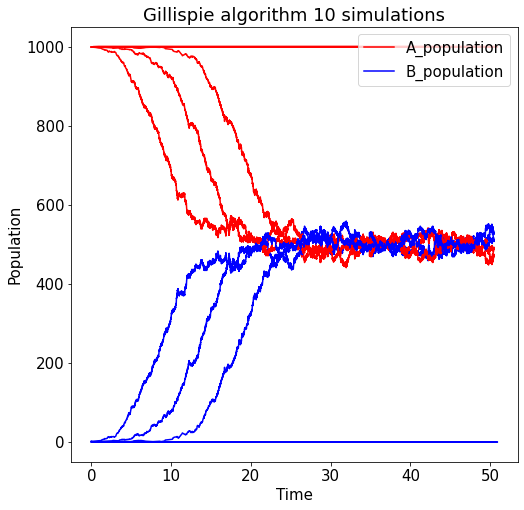

Large B0 population=1000,B0=900,beta=1,gamma=0.5


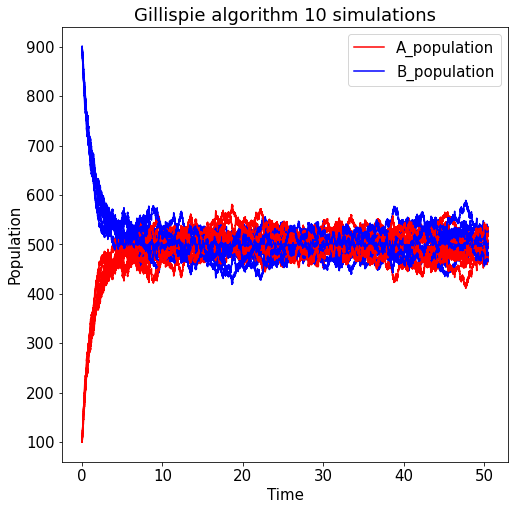

In [ ]:

np.random.seed(101) #to get the same results with each run

population=1000
initialB0=1
maxT=50
simulations=10

cases_sim=[['Small R0', population, initialB0*500, 0.05, 0.5],
      ['Large R0', population, initialB0 *500, 2.5, 0.5],
      ['R0= 1', population, initialB0*500, 0.5, 0.5],
      ['Small N', population/10, initialB0, 1, 0.5],
      ['Large N', population*10, initialB0*500, 1, 0.5],
      ['Small B0', population, initialB0, 1, 0.5],
      ['Large B0', population, initialB0*900, 1, 0.5]]

gillispie_times=[]
gillispie_Apop=[]
gillispie_Bpop=[]
for n in cases_sim:
   print(n[0],f'population={n[1]},B0={n[2]},beta={n[3]},gamma={n[4]}')
   N=int(n[1])
   B0=int(n[2])
   beta=n[3]
   gamma=n[4]

   plt.figure(figsize=(8,8))

    #Running the simmulation
   for j in range(simulations):
     gillispie_run_1= gillespie_ABA(N, B0, beta, gamma, maxT)

     time=gillispie_run_1[0]
     A=gillispie_run_1[1]
     B=gillispie_run_1[2]
     gillispie_times.append(gillispie_run_1[0])
     gillispie_Apop.append(gillispie_run_1[1])
     gillispie_Bpop.append(gillispie_run_1[2])

     #plotting the results of the simulation
     
     plt.plot(time,A,color='r',markersize=3)
     plt.plot(time,B,color='b',markersize=3)
     labels=['A_population','B_population']
     plt.legend(labels)
     plt.xlabel('Time')
     plt.ylabel('Population')

   plt.title('Gillispie algorithm 10 simulations')
   plt.show()
   
#Note : here every single case is plot separetely for clarity of plots 

Text(0.5, 1.0, 'All realizations of B population with 10 simulation runs')

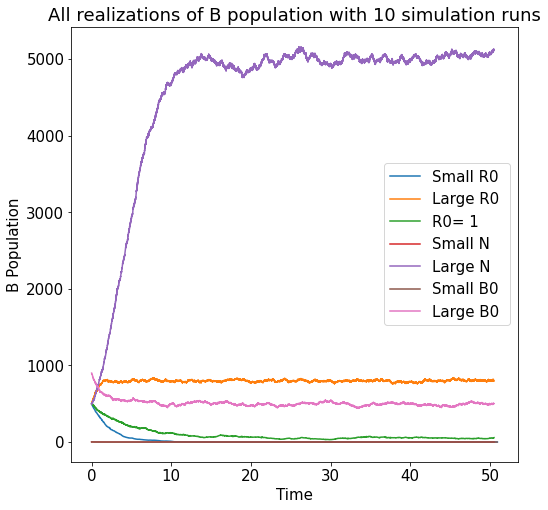

In [ ]:
#plotting all realizations of B population on a single plot 
#each scenario was run 10 times using gillispie 

plt.figure(figsize=(8,8))

plt.plot(gillispie_times[0:10][0],gillispie_Bpop[0:10][0])
plt.plot(gillispie_times[10:20][0],gillispie_Bpop[10:20][0])
plt.plot(gillispie_times[20:30][0],gillispie_Bpop[20:30][0])
plt.plot(gillispie_times[30:40][0],gillispie_Bpop[30:40][0])
plt.plot(gillispie_times[40:50][0],gillispie_Bpop[40:50][0])
plt.plot(gillispie_times[50:60][0],gillispie_Bpop[50:60][0])
plt.plot(gillispie_times[60:70][0],gillispie_Bpop[60:70][0])
labels=['Small R0','Large R0','R0= 1','Small N','Large N','Small B0','Large B0 ']
plt.legend(labels)
plt.xlabel('Time')
plt.ylabel('B Population')
#plt.ylim(top=2000)
plt.title('All realizations of B population with 10 simulation runs')

From the previous runs of the gillispie algorithm it can be seen that the simmulation part using this algorithm agrees with the B(t) equation and the integration of the mean field equation using forward euler from the Analytical part. 

As the populations tend to move towards the non zero equilibrium points.

here different cases were invistigated each case was run 10 times using the gillispie algorithm.A brief explanation for each case :

1) case 1 (small R0): it can be noticed here that the B population is decreasing while the A populatoin is increasing that is because betta is smaller than gamma, so the B population tend to go to zero and the A population tends to go to N when R0 is small R0<1.

2) case 2 (large R0): here B population is increasing towards N-N/R0 , and A population is decreasing towards N/R0 which is the fixed point mentioned before since beta>gamma.

3) case 3 (R0=1) : the system is tending to move to the point of (N,0) where A is moving for N and B is moving towards zero.

4) case4,5,6 and 7 : the system is moving towards the fixed point (N/R0,N-N/R0) since R0>1 even if N and B0 are varied.

##Question 2

Small R0 population=1000,B0=500,beta=0.05,gamma=0.5

 case with mean 21.9016 and std 1.7630484751966105 for B population, 
 and mean978.0984 and std 1.7630484751966105 for A population


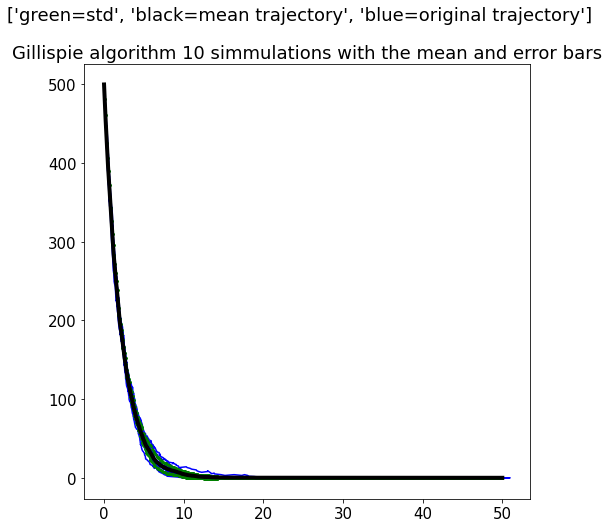

Large R0 population=1000,B0=500,beta=2.5,gamma=0.5

 case with mean 796.1626 and std 12.711358746950241 for B population, 
 and mean203.8374 and std 12.711358746950241 for A population


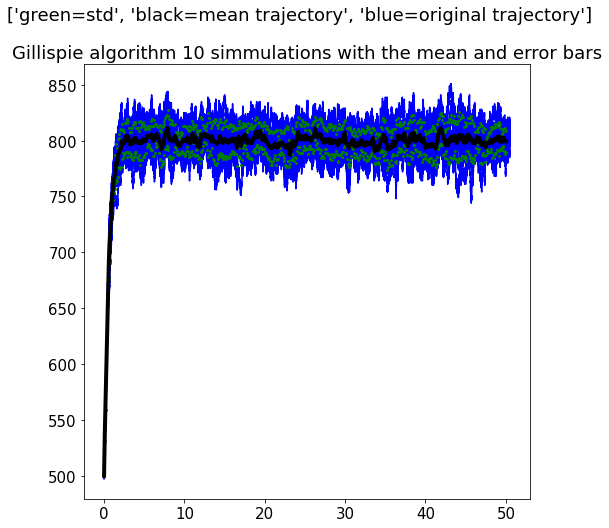

R0= 1 population=1000,B0=500,beta=0.5,gamma=0.5

 case with mean 99.89139999999999 and std 19.129919776214916 for B population, 
 and mean900.1086000000001 and std 19.129919776214916 for A population


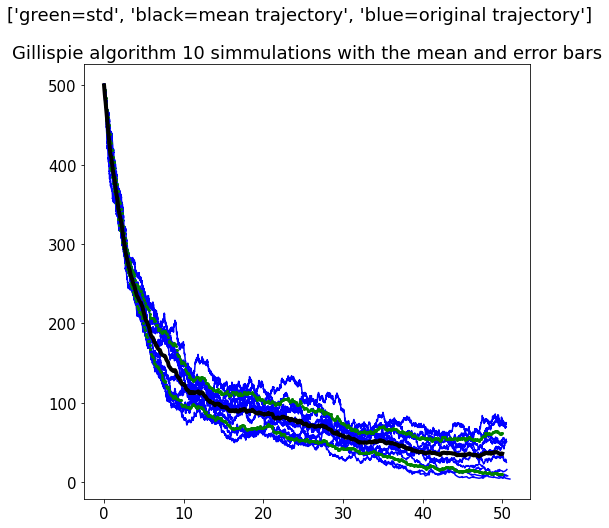

Small N population=100.0,B0=1,beta=1,gamma=0.5

 case with mean 17.2112 and std 21.408714174356945 for B population, 
 and mean82.7888 and std 21.408714174356945 for A population


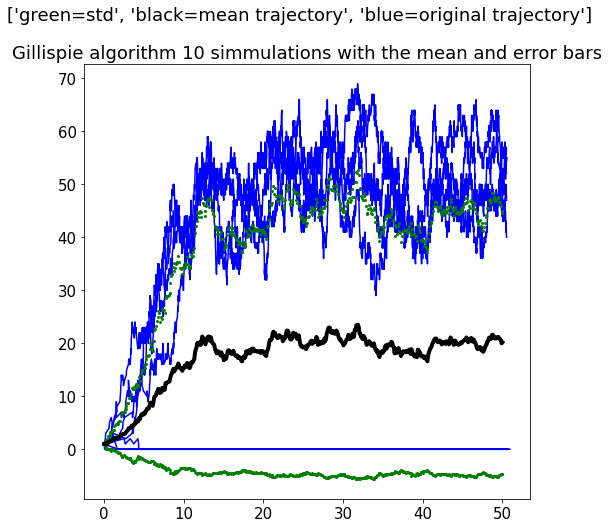

Large N population=10000,B0=500,beta=1,gamma=0.5

 case with mean 4534.0764 and std 78.4370838060047 for B population, 
 and mean5465.9236 and std 78.4370838060047 for A population


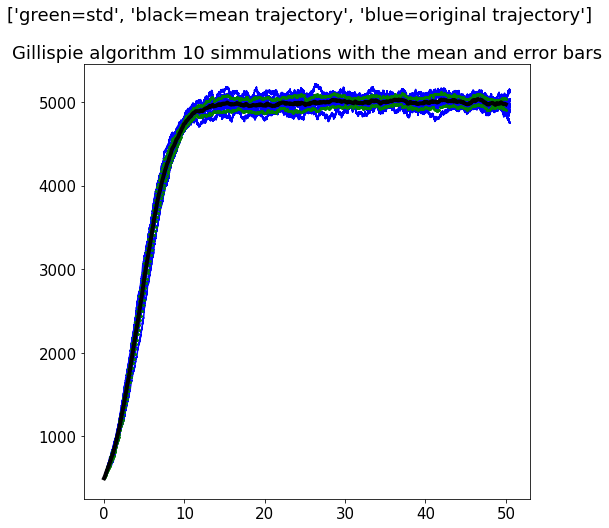

Small B0 population=1000,B0=1,beta=1,gamma=0.5

 case with mean 192.6018 and std 197.26450586189202 for B population, 
 and mean807.3982 and std 197.26450586189202 for A population


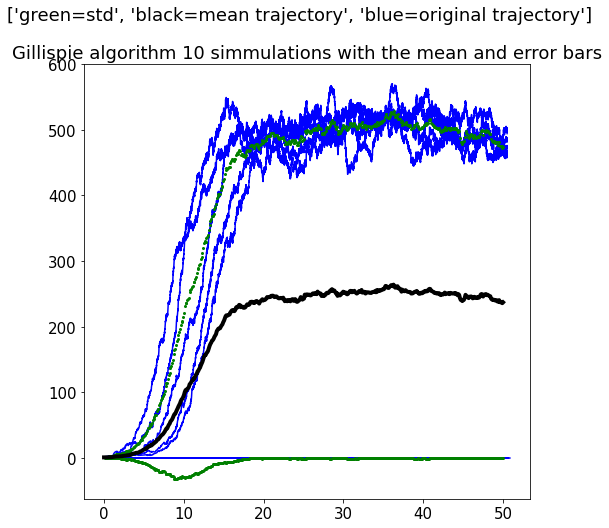

Large B0 population=1000,B0=900,beta=1,gamma=0.5

 case with mean 508.0274 and std 20.90804096207042 for B population, 
 and mean491.9726 and std 20.90804096207042 for A population


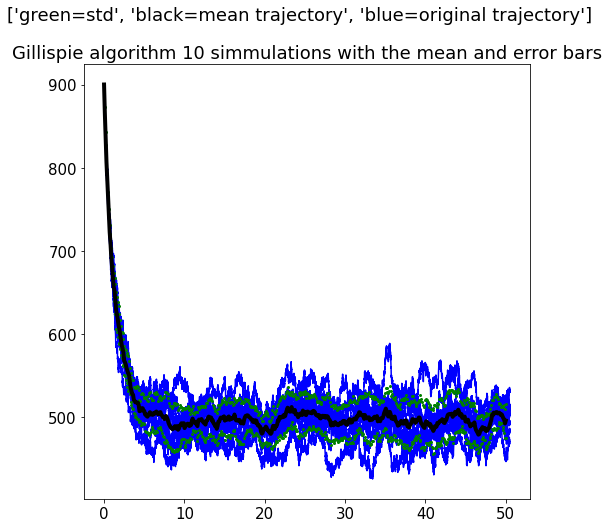

In [ ]:
#now the mean and the standard deviation of each case will be calculated using scipy library and plotted against the previous trajectories
#will be using the same cases_simulation from the previous question
np.random.seed(101) #to get the same results with each run

from scipy import interpolate

time_values=np.linspace(0,maxT,num=500)

for n in cases_sim:
  print(n[0],f'population={n[1]},B0={n[2]},beta={n[3]},gamma={n[4]}')


  N=int(n[1])
  B0=int(n[2])
  beta=n[3]
  gamma=n[4]

  A_population_2=[]
  B_population_2=[]

  plt.figure(figsize=(8,8))

  #Running the simulation
  for j in range(simulations):
    gillispie_run_2= gillespie_ABA(N, B0, beta, gamma, maxT)

    time=gillispie_run_2[0]
    A=gillispie_run_2[1]
    B=gillispie_run_2[2]

    #plotting the original trajectories
    #plt.plot(time,A,'-',color='r',markersize=2)
    plt.plot(time,B,'-',color='b',markersize=2)


    
    #interpolating the B values
    interpolating_B=interpolate.interp1d(gillispie_run_2[0],gillispie_run_2[2],kind='nearest')
    B_interpolated=interpolating_B(time_values)
    B_population_2.append(B_interpolated)

    #interpolating the A population
    interpolating_A=interpolate.interp1d(gillispie_run_2[0],gillispie_run_2[1],kind='nearest')
    A_interpolated=interpolating_A(time_values)
    A_population_2.append(A_interpolated)

  #Finding the mean and std of the interpolated values
  B_trajectories=np.array(B_population_2)
  mean_Btrajectories=np.mean(B_trajectories,axis=0)
  std_Btrajecotries=np.std(B_trajectories,axis=0)
  calcmeanB=mean_Btrajectories.sum()/len(mean_Btrajectories)
  calcstdB=std_Btrajecotries.sum()/len(std_Btrajecotries)

  A_trajectories=np.array(A_population_2)
  mean_Atrajectories=np.mean(A_trajectories,axis=0)
  std_Atrajecotries=np.std(A_trajectories,axis=0)
  calcmeanA=mean_Atrajectories.sum()/len(mean_Atrajectories)
  calcstdA=std_Atrajecotries.sum()/len(std_Atrajecotries)

  #plotting the results
  #Note:If the viewer wants to see the plots for A trajectory uncomment the next three lines of code for A trajectories, this was done for the sake of tidiness of the plots.
  plt.plot(time_values,mean_Btrajectories+std_Btrajecotries,'.',lw=3,color='g',markersize=4)
  plt.plot(time_values,mean_Btrajectories-std_Btrajecotries,'.',lw=3,color='g',markersize=4)
  plt.plot(time_values,mean_Btrajectories,lw=4,color='k',markersize=4)

  #plt.plot(time_values,mean_Atrajectories+std_Atrajecotries,lw=3,color='g')
  #plt.plot(time_values,mean_Atrajectories-std_Atrajecotries,lw=3,color='g')
  #plt.plot(time_values,mean_Atrajectories,lw=5,color='k')

  plt.title('Gillispie algorithm 10 simmulations with the mean and error bars')
  labels=['green=std','black=mean trajectory','blue=original trajectory']
  plt.suptitle(labels)
  print(f'\n case with mean {calcmeanB} and std {calcstdB} for B population, \n and mean{calcmeanA} and std {calcstdA} for A population')
  plt.show()


##Question 3

In this quesiton the mean field equation using euler method will be superimposed to the results of the previous two simulation questions.

In [ ]:
#using euler to integrate the mean field equation to compare it to the gilspie trajectories 

def euler_sim(F,B0,T=499,n=499):
  t=np.zeros(n+1)
  B=np.zeros(n+1)
  B[0]=B0 #setting the initial condition 
  t[0]=0
  h=T/n #time step of 1 
  for i in range(n):
    t[i+1]=t[i]+h
    B[i+1]=B[i]+h*F(B[i],t[i])
  return (B,t)

Small R0 population=1000,B0=500,beta=0.05,gamma=0.5


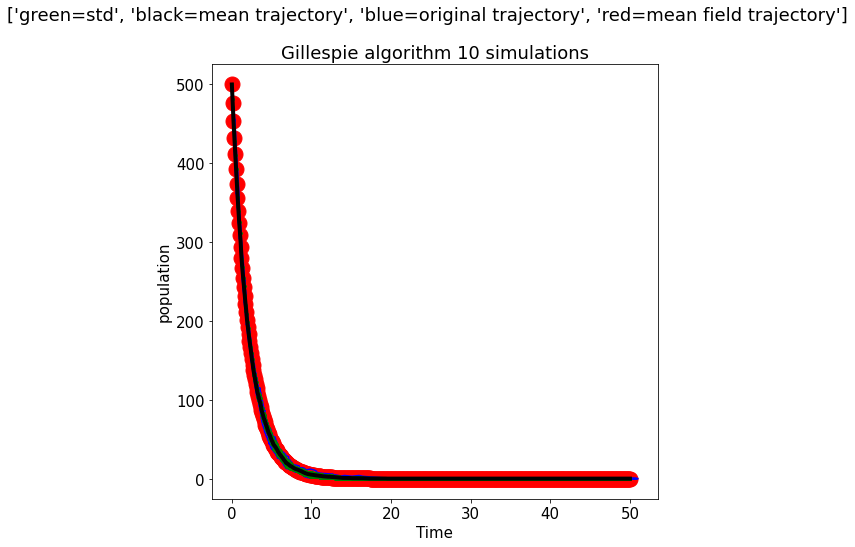

Large R0 population=1000,B0=500,beta=2.5,gamma=0.5


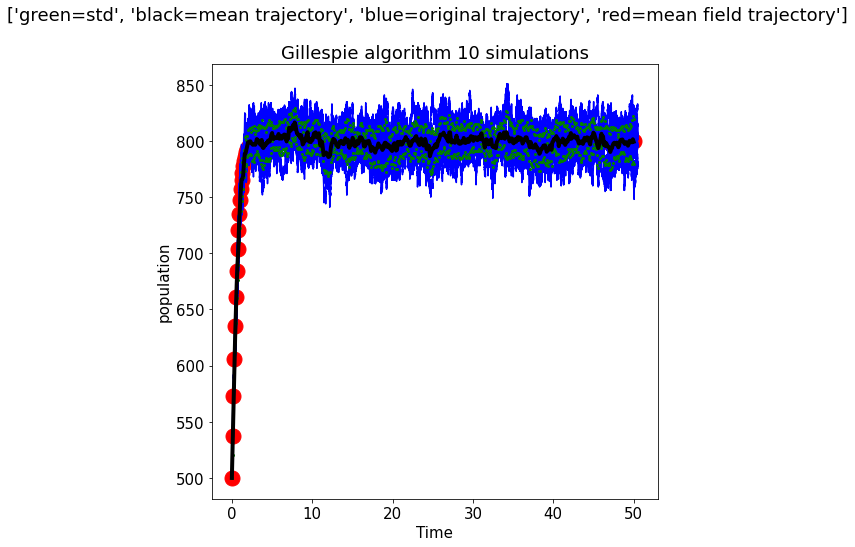

R0= 1 population=1000,B0=500,beta=0.5,gamma=0.5


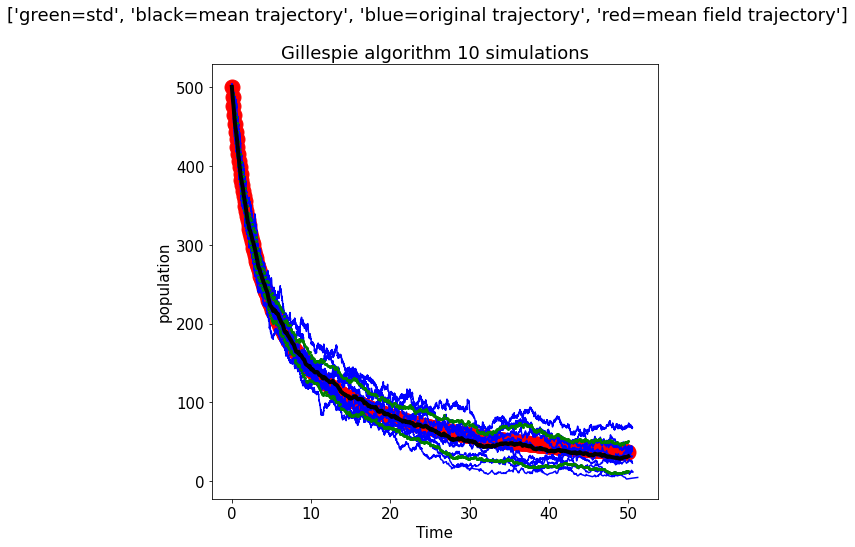

Small N population=100.0,B0=1,beta=1,gamma=0.5


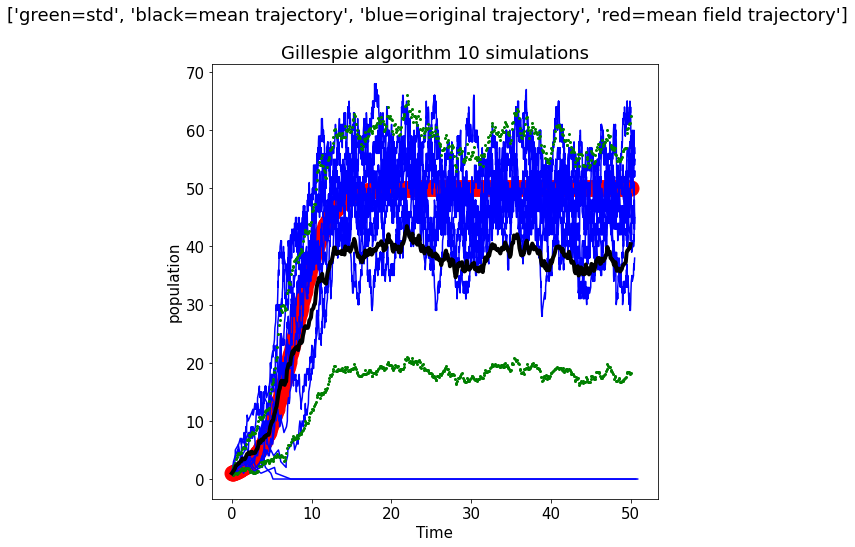

Large N population=10000,B0=500,beta=1,gamma=0.5


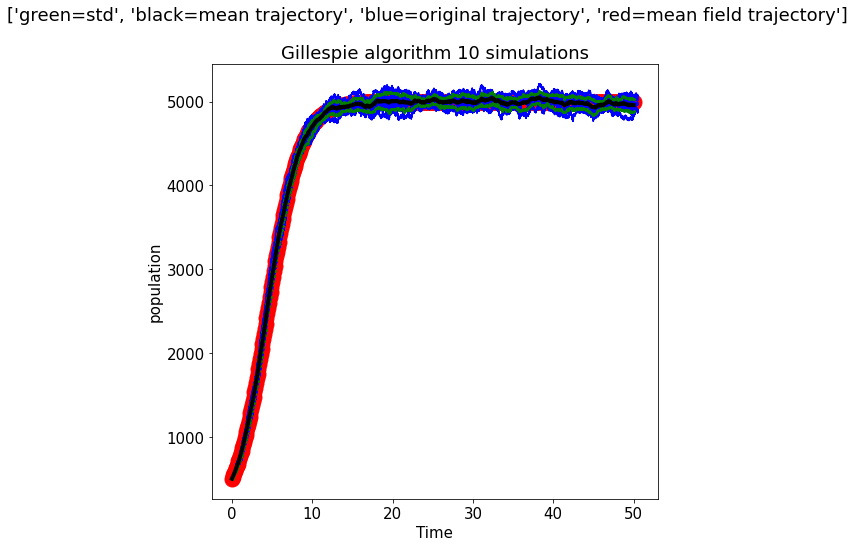

Small B0 population=1000,B0=1,beta=1,gamma=0.5


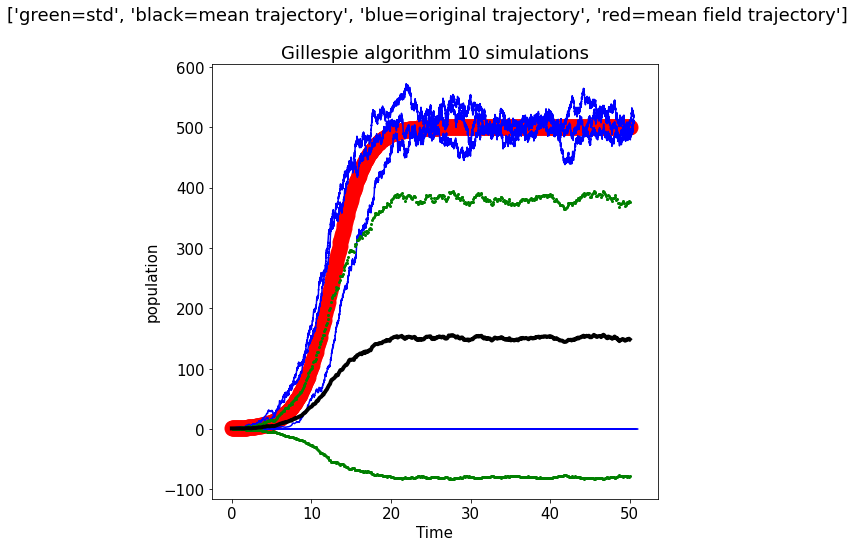

Large B0 population=1000,B0=900,beta=1,gamma=0.5


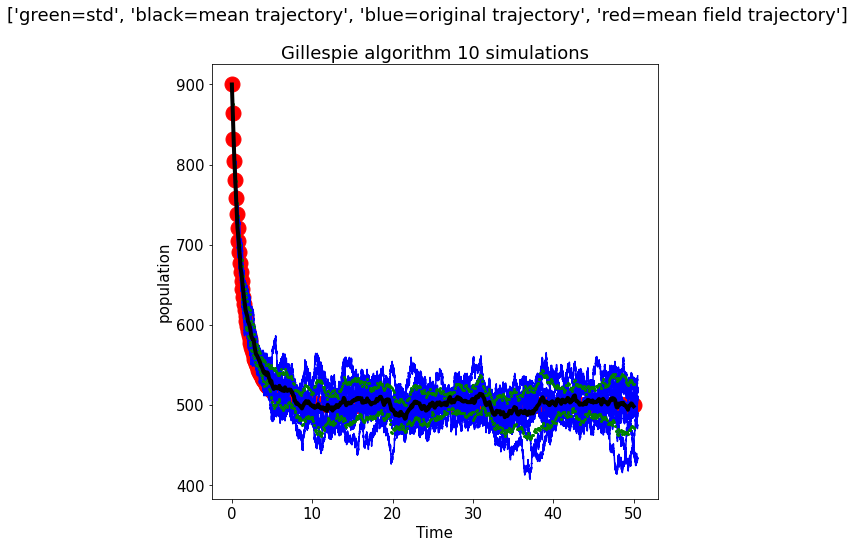

In [ ]:
#Note: The following cell might take up to 4 minutes to run depending on the provided computational power
#comparing the mean stochastic with the standard deviations trajectories to the mean field equation trajectories
np.random.seed(101) #to get the same results with each run
population=1000
initialB0=1
maxT=50
simulations=10


for n in cases_sim:
    print(n[0],f'population={n[1]},B0={n[2]},beta={n[3]},gamma={n[4]}')
    N=int(n[1])
    B0=int(n[2])
    beta=n[3]
    gamma=n[4]

    A_population_3=[]
    B_population_3=[]

    plt.figure(figsize=(8,8))

    #Function which is a parameter of euler_sim for mean field solution
    def F(B,t):

      return(beta-((beta*B)/int(n[1]))-0.5)*B #mean filed equation with N=1000 and gamma fixed at 0.5

    (B1,T1)=euler_sim(F,n[2],T=50)
    plt.plot(T1,B1,'.',lw=3,color='r',markersize=30) #plotting the mean field solution using forward euler

    #Running the simulation
    for j in range(simulations):
        gillespie_run_3 = gillespie_ABA(N, B0, beta, gamma, maxT)
        time=gillespie_run_3[0]
        A=gillespie_run_3[1]
        B=gillespie_run_3[2]

        #interpolating the values of B same as Q2
        interpolating_B=interpolate.interp1d(gillespie_run_3[0], gillespie_run_3[2], kind="nearest")
        B_interpolated=interpolating_B(time_values)
        B_population_3.append(B_interpolated)

        #plotting the values of simulation Q1
        plt.plot(time, B, '-', color='b', markersize=2)
        plt.xlabel('Time')
        plt.ylabel('population')
 
    # compute the mean  and standard deviation
    B_trajectories=np.array(B_population_3)
    mean_Btrajectories=np.mean(B_trajectories,axis=0)
    std_Btrajecotries=np.std(B_trajectories,axis=0)

    # plot the mean and standard deviation
    plt.plot(time_values,mean_Btrajectories+std_Btrajecotries,'.',lw=3,color='g',markersize=4)
    plt.plot(time_values,mean_Btrajectories-std_Btrajecotries,'.',lw=3,color='g',markersize=4)
    plt.plot(time_values,mean_Btrajectories,lw=4,color='k',markersize=4)
   
    plt.title('Gillespie algorithm 10 simulations')
    labels=['green=std','black=mean trajectory','blue=original trajectory','red=mean field trajectory']
    plt.suptitle(labels)
    plt.show()
   



As it can be seen that the mean field equation using forward euler trajectory plots agrees with the gillispie algorithm trajcectories.

Also the original trajectory seem to be around the mean trajectory with reasonable standard deviations except for the following two cases: 1) when N is a large values 2)small B0.  

Note: The run time=50 was considered here, because the algorithm takes alot of time to run if the time is increased, the case goes the same for all of the gillispie algorithm runs.

##Question 4

N=1000,R0=0.51/0.5 population=1000,B0=500,beta=0.51,gamma=0.5
N=1000,R0=0.95/0.5 population=1000,B0=1,beta=0.95,gamma=0.5


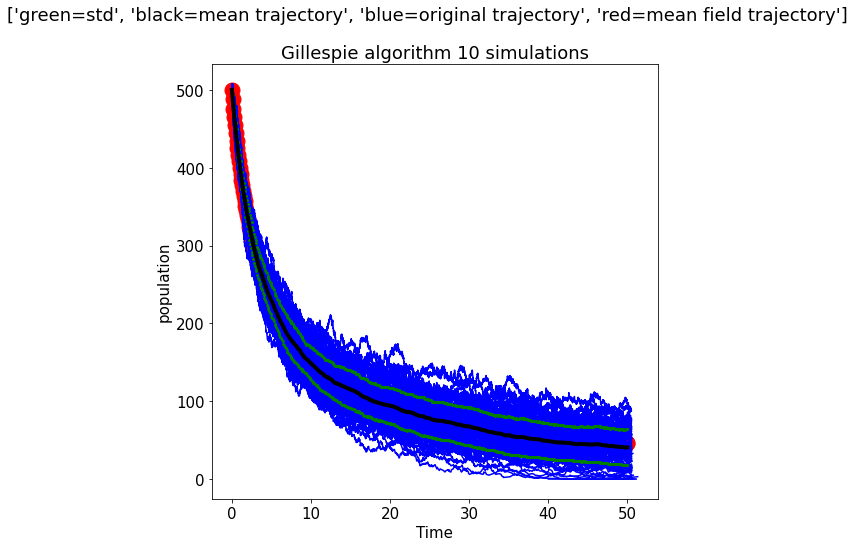

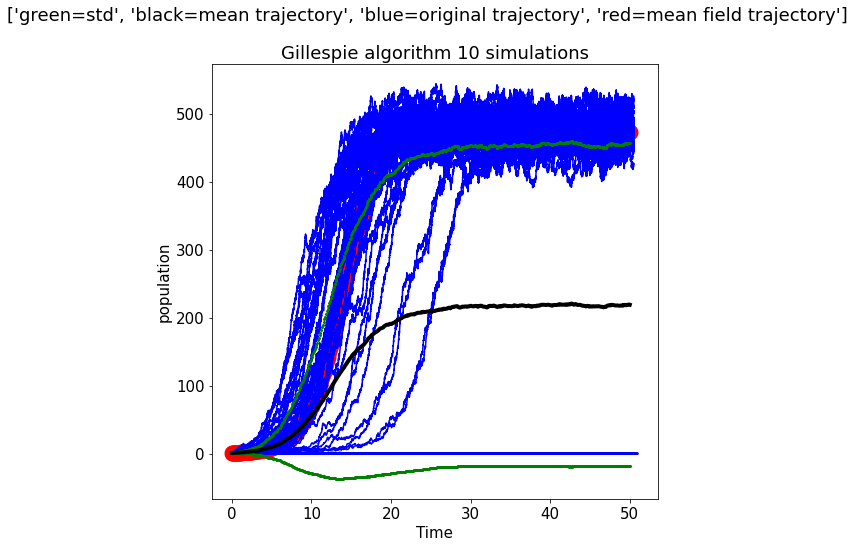

In [ ]:
#In this question on two cases will be invistigated for 100 simulations
#Note:This cell might take up to 4 minutes to run

np.random.seed(101) #to get the same results with each run

population=1000
initialB0=1
maxT=50
simulations=100 #changing the number of simulations to 100

#This simulation run only the following two cases will be considered
cases_sim_4=[['N=1000,R0=0.51/0.5',population,initialB0*500,0.51,0.5],
             ['N=1000,R0=0.95/0.5',population,initialB0,0.95,0.5]]

for n in cases_sim_4:
    print(n[0],f'population={n[1]},B0={n[2]},beta={n[3]},gamma={n[4]}')
    N=int(n[1])
    B0=int(n[2])
    beta=n[3]
    gamma=n[4]

    A_population_3=[]
    B_population_3=[]

    plt.figure(figsize=(8,8))

    #Function which is a parameter of euler_sim for mean field solution
    def F(B,t):

      return(beta-((beta*B)/int(n[1]))-0.5)*B #mean filed equation with N=1000 and gamma fixed at 0.5

    (B1,T1)=euler_sim(F,n[2],T=50)
    plt.plot(T1,B1,'.',lw=3,color='r',markersize=30) #plotting the mean field solution using forward euler
    #Running the simulation

    for j in range(simulations):
        gillespie_run_3 = gillespie_ABA(N, B0, beta, gamma, maxT)
        time=gillespie_run_3[0]
        A=gillespie_run_3[1]
        B=gillespie_run_3[2]

        #interpolating the values of B same as Q2
        interpolating_B=interpolate.interp1d(gillespie_run_3[0], gillespie_run_3[2], kind="nearest")
        B_interpolated=interpolating_B(time_values)
        B_population_3.append(B_interpolated)

        #plotting the values of simulation Q1
        plt.plot(time, B, '-', color='b', markersize=2)
        plt.xlabel('Time')
        plt.ylabel('population')
 
    # compute the mean  and standard deviation
    B_trajectories=np.array(B_population_3)
    mean_Btrajectories=np.mean(B_trajectories,axis=0)
    std_Btrajecotries=np.std(B_trajectories,axis=0)

    # plot the mean and standard deviation
    plt.plot(time_values,mean_Btrajectories+std_Btrajecotries,'.',lw=3,color='g',markersize=4)
    plt.plot(time_values,mean_Btrajectories-std_Btrajecotries,'.',lw=3,color='g',markersize=4)
    plt.plot(time_values,mean_Btrajectories,lw=4,color='k',markersize=4)
   
    plt.title('Gillespie algorithm 10 simulations')
    labels=['green=std','black=mean trajectory','blue=original trajectory','red=mean field trajectory']
    plt.suptitle(labels)

#it can be noticed that there is great difference between the mean field trajectory and the mean trajectory of the realisations for case 2 where beta=0.95 and gamma=0.5

#Critical Thinking

##Question 1

From the first look at the ODEs provided for this system it can be easily noticed that this system represents two populations in two different states, and each population is moving to the other state depending on the two parameters gamma and beta, also other factors play an important role in how the populations tend to move from one state to the other, which are N(the total number of the population) and B0. So a Scenario which can be thought of that represent these ODES is a model called SIS (susceptible-infectious-susceptible) epidemic model, which is a model that calculates the rate of a population infecting another populatoin with a certain disease with respect to time. In the case of the model in hand if B is considered the infected population and A is the healthy population,then beta will be the parameter responsible to determing the infection rate, and gamma is the parameter of infected people moving back to the healthy populatoin of A. for the fixed points determined the first one (N,0) is a state where all of the population is healthy and no infection is present, the other point (N/R0,N-N/R0) is a fixed point where the diesease is present and the populations are moving between the two stated at a rate of R0 which is determined by beta/gamma. Now when the case if R0=1 the second fixed point (N/R0,N-N/R0) will equal to the first fixed point (N,0) and the here is the case where the rate of infection and recovery will be equal,i.e the populations will not move between the two states. The closest pandemic that can be thought of nowadays is Covid-19 which can be modelled using these ODES, or for example any infectious viral disease that can cause threat to the human kind and which is transmissable on a global scale, i.e pandemics, usually pandemics happen due to a viral spread , so also H1N1 for example can be modelled using this approach. Now there are many benefits to model such a system,to mention a few, scientist use such models to predict the future of transmission of such an infection, and then decide what measures should be applied on the public to reduce the transmission and hospitalization rate, also such information could be helpful to produce a vaccine. Moreover studying such diseases will provide future experience and predicitions on how to deal with any upcoming pandemics and use the current data to be better prepared in the future in case such a thing has occured again.



##Question 2

To add on the paragraph above, afterall this is a simulation and it does not explicitly represent a real life situation, it can be used to model something very close to what is happening in a real life pandemic situation. First of all the algorithm does not take into consideration the contact time needed for a person to move from state A to B nor the transmission method that the disease is transmitted with, also it is considering that all of the populations are in contact with each other, this is not that case in real life, as some people in the society tend to interact more with other people (ex: a person working in a huge supermarket will have more contact with people compared to a stay at home parent). Moreover the government might take some strict measures to prevent the contact of the populations with each other like a total lock down , in this case less contact will occur and these scenarios are not considered in the gillispie algorithm, on the other hand it gives researchers a closer approach to reality and to what realy is going on , which helps alot to mitigate the outcomes of such diseases.

#Refrences

In [ ]:
##This code will word count all of the markdown cells in the notebook saved at filepath
##Running it before providing any answers shows that the questions have a word count of 437

import io
from nbformat import current

filepath="/content/drive/MyDrive/Colab Notebooks"
filepath="/content/drive/MyDrive/Colab Notebooks/MCMS_Report_Final.ipynb"
question_count=437

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Submission length is 1098




1.   https://www.nature.com/articles/s41598-019-52351-x (SIS models)
2.   https://www.youtube.com/watch?v=CIERyk_36lk (forward euler using python)
3.   https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html (using scipy for interpolation)
4.   https://matplotlib.org/stable/gallery/color/named_colors.html (using matplot lib plots and coloring)
5.https://en.wikipedia.org/wiki/Gillespie_algorithm (Gillespie_algorithm)
6.NLP lab for code to count the words (submission length)


